# Djangoモデルをjupyterで使う
## Djangoの環境設定

In [1]:
MYPROJECT = '/home/notebooks'
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings")
import django
django.setup()

## Django QuerySet API を使った Exchangeモデル参照

In [2]:
from bot.models import Exchange
Exchange.objects.filter(name=Exchange.CC)[:3]

<QuerySet [<Exchange: Coincheck>, <Exchange: Coincheck>, <Exchange: Coincheck>]>

## モデルをpandasに取り込む

In [3]:
import pandas as pd
from django_pandas.io import read_frame
read_frame(Exchange.objects.filter(name=Exchange.CC)[:3])

id       name btc_jpy_ask btc_usd_ask btc_jpy_bid btc_usd_bid  \
0  536777  Coincheck   725492.00        0.00   725228.00        0.00   
1  536770  Coincheck   726082.00        0.00   725732.00        0.00   
2  536763  Coincheck   725249.00        0.00   724981.00        0.00   

                        created_at                       updated_at  
0 2018-08-23 23:59:37.482758+00:00 2018-08-23 23:59:37.482815+00:00  
1 2018-08-23 23:58:18.500374+00:00 2018-08-23 23:58:18.500427+00:00  
2 2018-08-23 23:56:59.537213+00:00 2018-08-23 23:56:59.537260+00:00

## matplotlibの環境設定

Text(0.5,0,'Timeline')

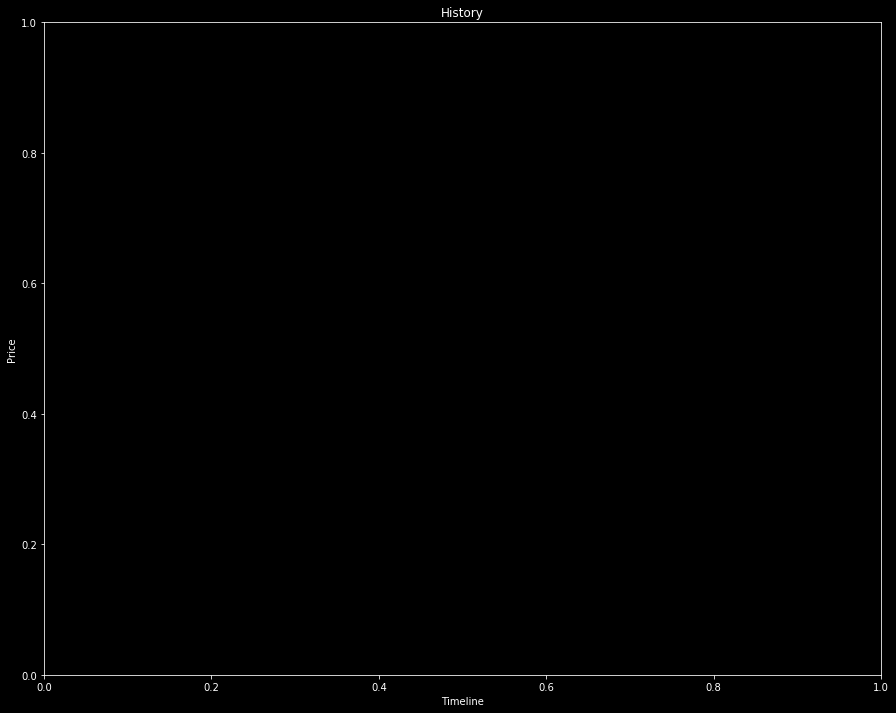

In [5]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
plt.title("History")
plt.ylabel('Price')
plt.xlabel('Timeline')

## timezoneの設定と検索日時の作成

In [6]:
from datetime import datetime, timedelta
from django.utils import timezone
import pytz
timezone.now()
first_date = datetime(2018, 6, 15, tzinfo=pytz.UTC)
last_date = datetime(2018, 6, 28, tzinfo=pytz.UTC)
first_date

datetime.datetime(2018, 6, 15, 0, 0, tzinfo=<UTC>)

## bitflyerのask値を移動平均(60分)に変換

In [7]:
bitflyer = read_frame(
    Exchange.objects.filter(
        name=Exchange.BF, created_at__range=(first_date, last_date)).order_by('created_at'))
bitflyer = bitflyer.set_index('created_at')
ask_bitflyer = pd.Series.rolling(bitflyer['btc_jpy_ask'], 60).mean()
ask_bitflyer

created_at
2018-06-15 00:00:53.068842+00:00              NaN
2018-06-15 00:02:10.920124+00:00              NaN
2018-06-15 00:03:28.977493+00:00              NaN
2018-06-15 00:04:46.902623+00:00              NaN
2018-06-15 00:06:04.473151+00:00              NaN
2018-06-15 00:07:23.438086+00:00              NaN
2018-06-15 00:08:41.083682+00:00              NaN
2018-06-15 00:09:58.709578+00:00              NaN
2018-06-15 00:11:16.253851+00:00              NaN
2018-06-15 00:12:33.734311+00:00              NaN
2018-06-15 00:13:51.216866+00:00              NaN
2018-06-15 00:15:09.257442+00:00              NaN
2018-06-15 00:16:26.505934+00:00              NaN
2018-06-15 00:17:44.224264+00:00              NaN
2018-06-15 00:19:02.277901+00:00              NaN
2018-06-15 00:20:20.024714+00:00              NaN
2018-06-15 00:21:38.060840+00:00              NaN
2018-06-15 00:22:55.613315+00:00              NaN
2018-06-15 00:24:13.223861+00:00              NaN
2018-06-15 00:25:31.683751+00:00       

## Plot出力

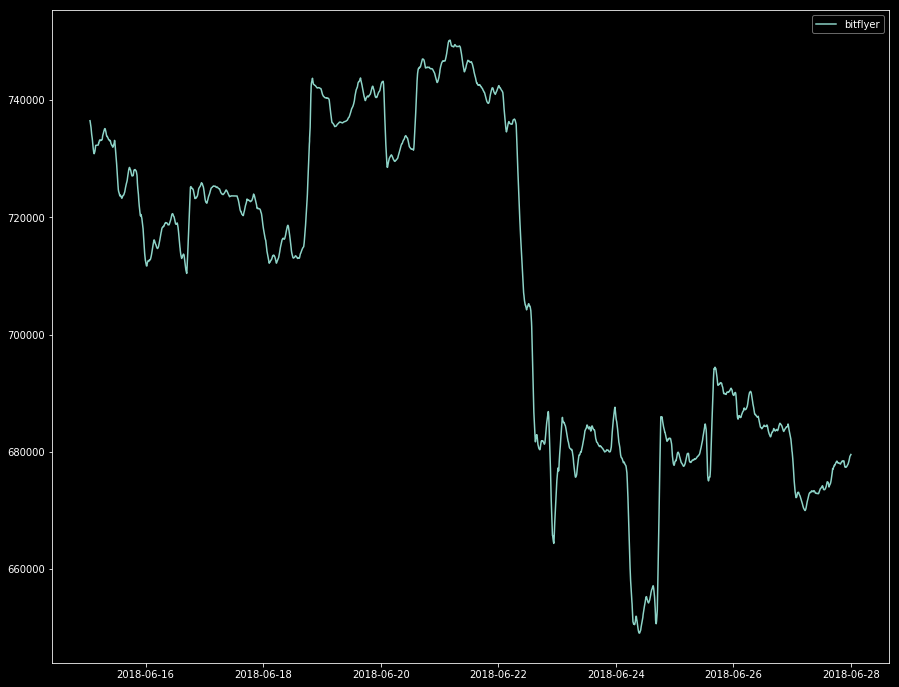

In [8]:
plt.plot(bitflyer.index, ask_bitflyer, color='C0', label="bitflyer")
leg = plt.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)